In [55]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa

# plt.style.use('fivethirtyeight')
# %matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 8

import plotly.express as px



import functions as fun


import datetime
import seaborn as sns
sns.set()



In [56]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# plotting dfs:
('roi_df_plotting.csv')
('top_percent_roi_plotting.csv')
('chi_plot.csv')

# modeling dfs:
('top_roi_for_melting.csv')



'top_roi_for_melting.csv'

In [58]:
df = pd.read_csv('chicago_melted.csv')
df.head()

,ZipCode,Time,Value
0,60657,2011-01-01,729300.0
1,60614,2011-01-01,923000.0
2,60640,2011-01-01,600000.0
3,60647,2011-01-01,286500.0
4,60618,2011-01-01,317400.0


In [59]:
df.columns

Index(['ZipCode', 'Time', 'Value'], dtype='object')

In [60]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m')
df.set_index('Time', inplace = True)
df.head()

,ZipCode,Value
Time,,
2011-01-01,60657,729300.0
2011-01-01,60614,923000.0
2011-01-01,60640,600000.0
2011-01-01,60647,286500.0
2011-01-01,60618,317400.0


In [61]:
df.index
# df.head()

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Time', length=1760, freq=None)

In [62]:
zip_dict = {}
zip_list = df.ZipCode.unique()
for x in zip_list:
    ts = (df[df['ZipCode']==x]['Value'].copy())
    ts.name = x 
    zip_dict[x] = ts

In [63]:
zip_dict[60647]

Time
2011-01-01    286500.0
2011-02-01    285800.0
2011-03-01    283800.0
2011-04-01    282100.0
2011-05-01    281700.0
                ...   
2017-12-01    470600.0
2018-01-01    474500.0
2018-02-01    475100.0
2018-03-01    472600.0
2018-04-01    470200.0
Name: 60647, Length: 88, dtype: float64

In [64]:
# zip_df = pd.DataFrame(pd.concat(zip_dict))

In [65]:
# zip_series = pd.concat(zip_dict)

In [66]:
# zip_df.columns

In [67]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [68]:
zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['Value']].copy()))

In [69]:
zip_list

array([60657, 60614, 60640, 60647, 60618, 60613, 60629, 60625, 60619,
       60610, 60620, 60634, 60626, 60649, 60616, 60622, 60615, 60641,
       60660, 60608])

In [70]:
zip_dfs

[                Value
 Time                 
 2011-01-01   729300.0
 2011-02-01   730200.0
 2011-03-01   730700.0
 2011-04-01   730000.0
 2011-05-01   730100.0
 ...               ...
 2017-12-01  1018700.0
 2018-01-01  1024400.0
 2018-02-01  1030700.0
 2018-03-01  1033800.0
 2018-04-01  1030600.0
 
 [88 rows x 1 columns],                 Value
 Time                 
 2011-01-01   923000.0
 2011-02-01   925000.0
 2011-03-01   923300.0
 2011-04-01   916600.0
 2011-05-01   912400.0
 ...               ...
 2017-12-01  1299000.0
 2018-01-01  1302700.0
 2018-02-01  1306400.0
 2018-03-01  1308500.0
 2018-04-01  1307000.0
 
 [88 rows x 1 columns],                Value
 Time                
 2011-01-01  600000.0
 2011-02-01  601600.0
 2011-03-01  599700.0
 2011-04-01  590500.0
 2011-05-01  578900.0
 ...              ...
 2017-12-01  777900.0
 2018-01-01  778500.0
 2018-02-01  780500.0
 2018-03-01  782800.0
 2018-04-01  782800.0
 
 [88 rows x 1 columns],                Value
 Time              

In [71]:
df.head()

,ZipCode,Value
Time,,
2011-01-01,60657,729300.0
2011-01-01,60614,923000.0
2011-01-01,60640,600000.0
2011-01-01,60647,286500.0
2011-01-01,60618,317400.0


In [132]:
orders = {}
for name in zip_list:
# for df, name in zip(zip_dfs, zip_list):
    ans = []
    import warnings
    warnings.filterwarnings('ignore')
    train = zip_dict[name].loc['2011-01-01':'2015-03-01']
    test = zip_dict[name].loc['2015-04-01':]
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
#                 print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue
    orders[name] = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])

In [50]:
# result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])
# result

In [20]:
# result.tail()

In [77]:
# test_zip = orders[60647]
# orders.keys().idxmin()

In [79]:
# best_para = test_zip.loc[test_zip['AIC'].idxmin()]

In [81]:
# best_para['pdq']

(1, 1, 1)

In [51]:
# orders.keys()

dict_keys([60657, 60614, 60640, 60647, 60618, 60613, 60629, 60625, 60619, 60610, 60620, 60634, 60626, 60649, 60616, 60622, 60615, 60641, 60660, 60608])

In [22]:
# for aic in range(orders):
#     print(aic[0][3])

In [23]:
# best_para = result.loc[result.groupby("name")["AIC"].idxmin()]
# best_para

,name,pdq,pdqs,AIC
59,60608,"(1, 1, 1)","(0, 1, 1, 12)",1068.956038


In [24]:
# orders_dict = best_para.to_dict()

In [94]:
# zip_dict

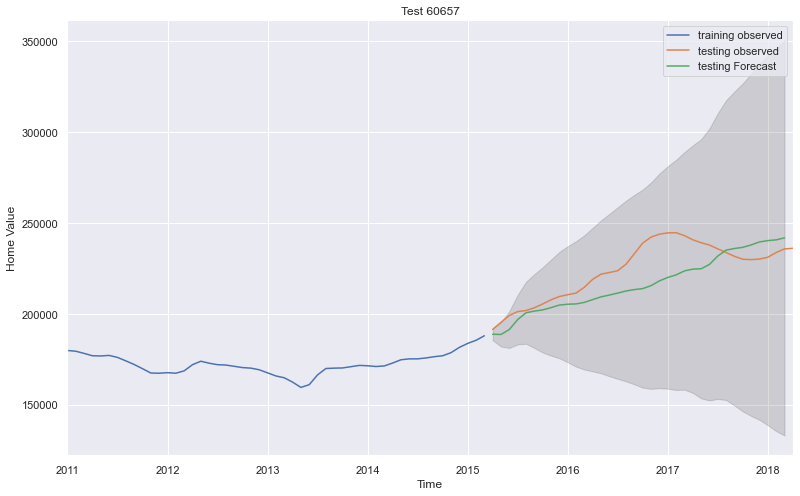

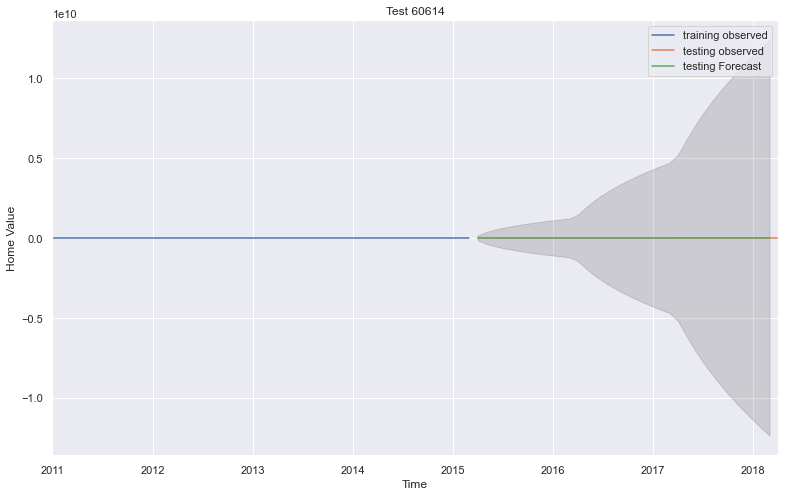

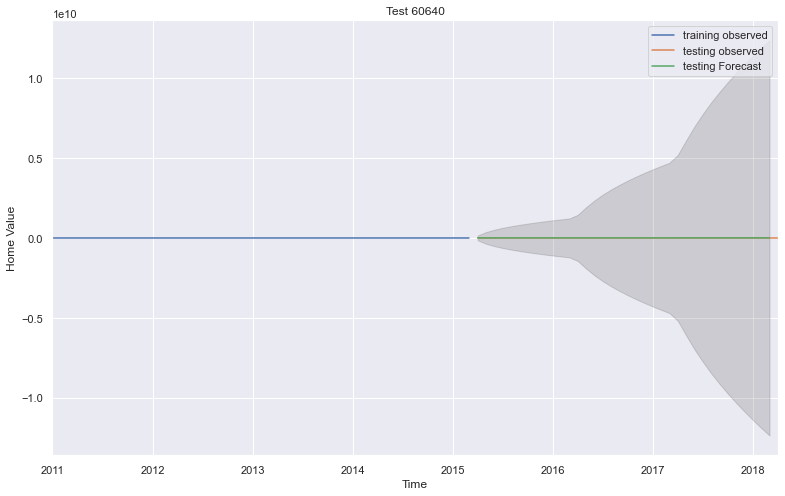

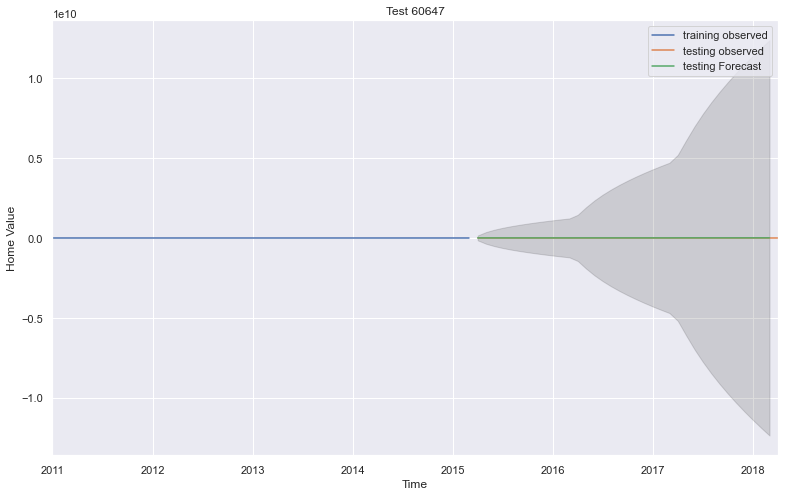

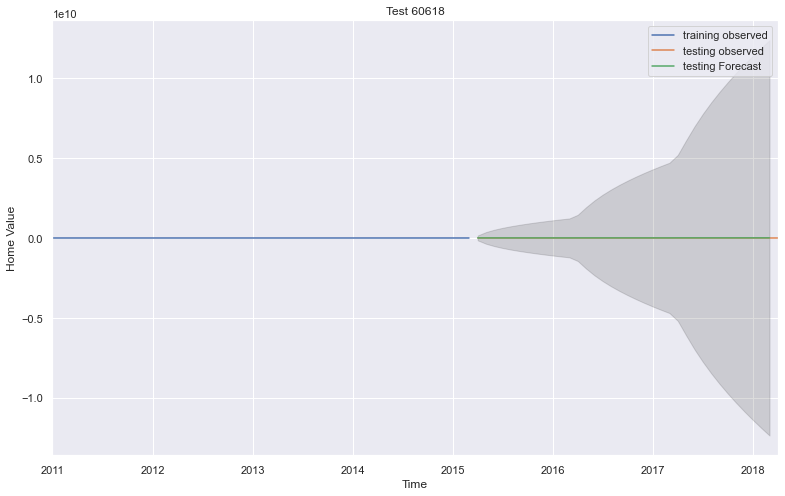

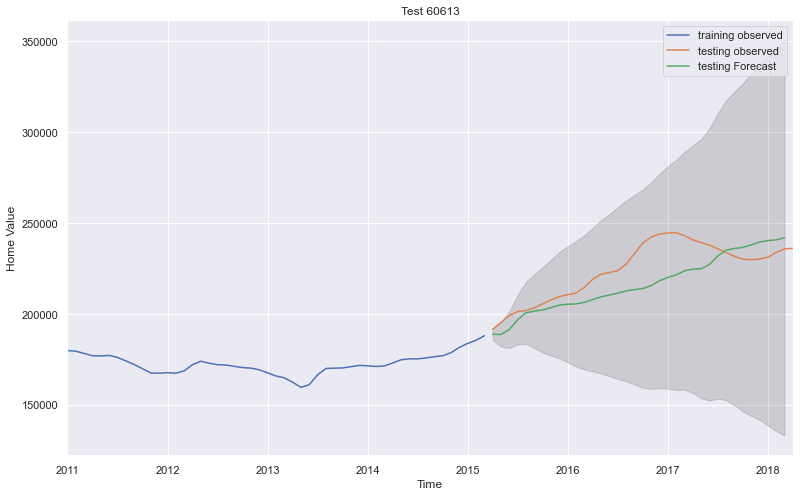

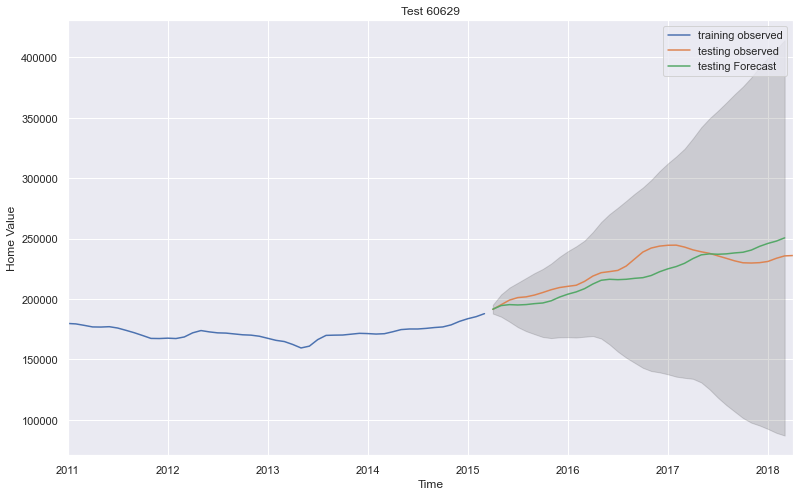

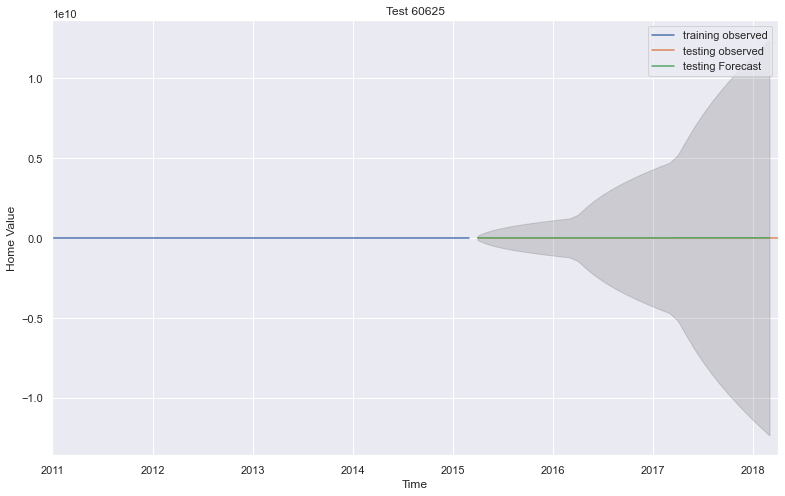

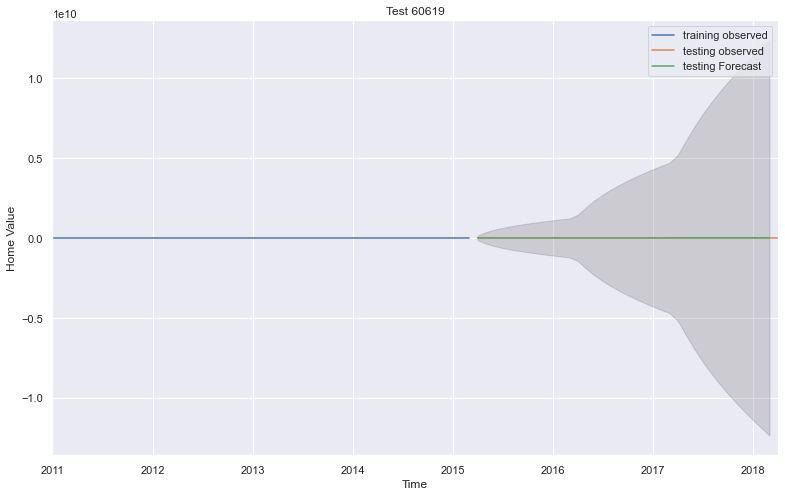

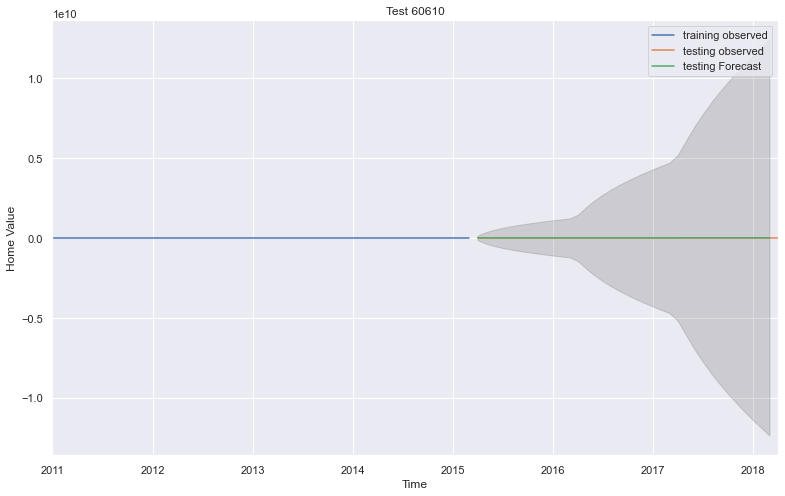

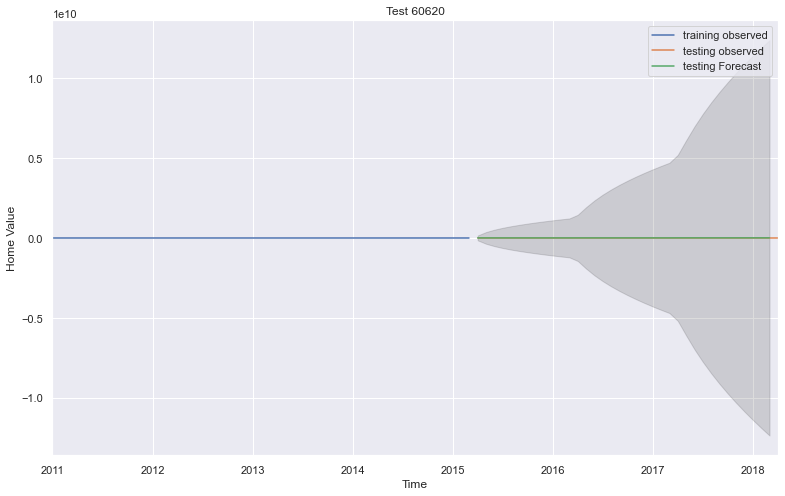

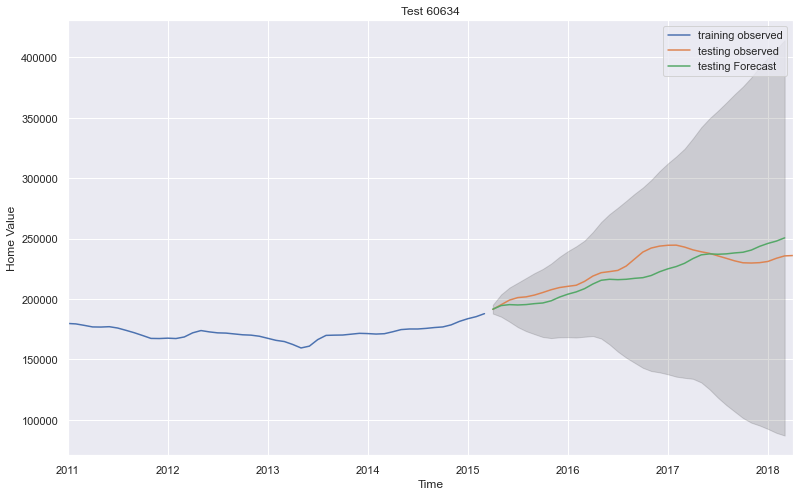

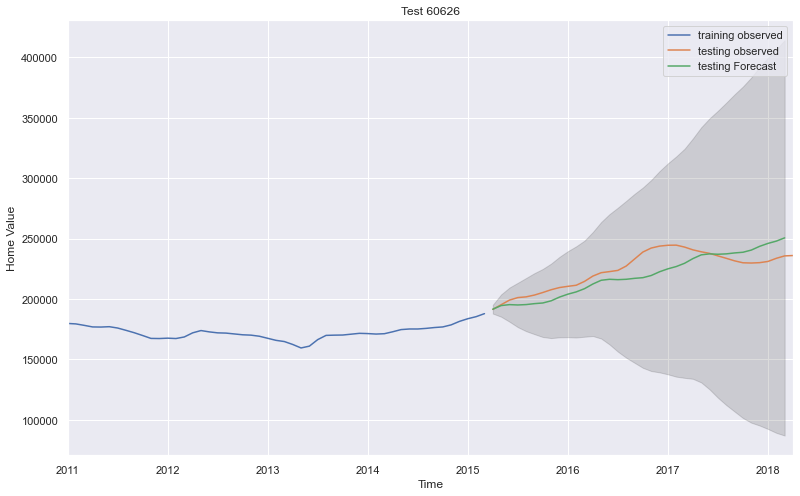

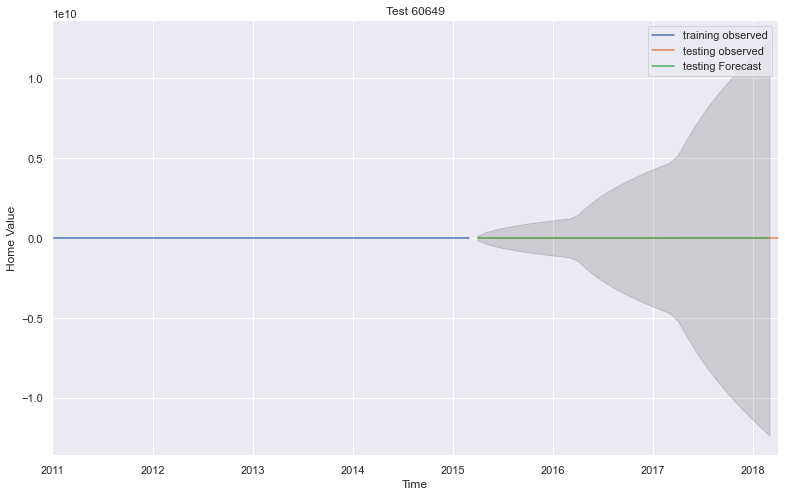

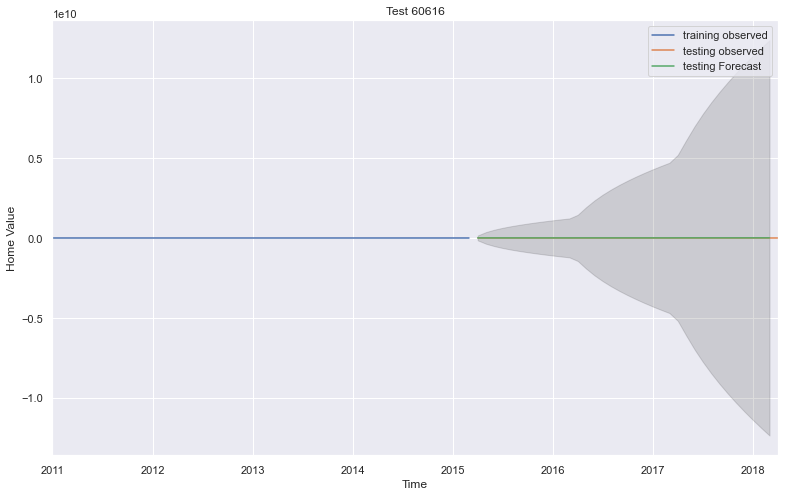

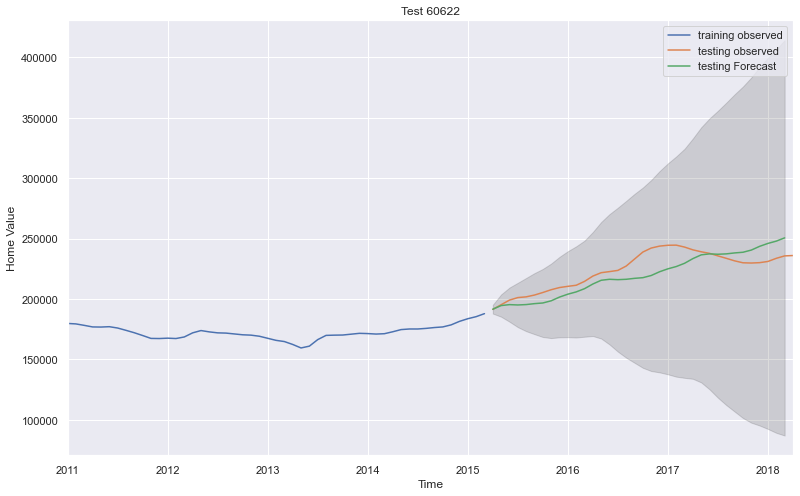

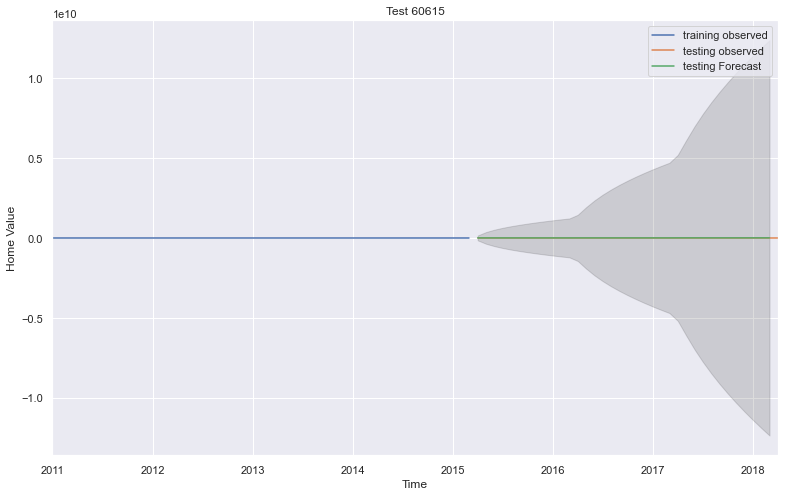

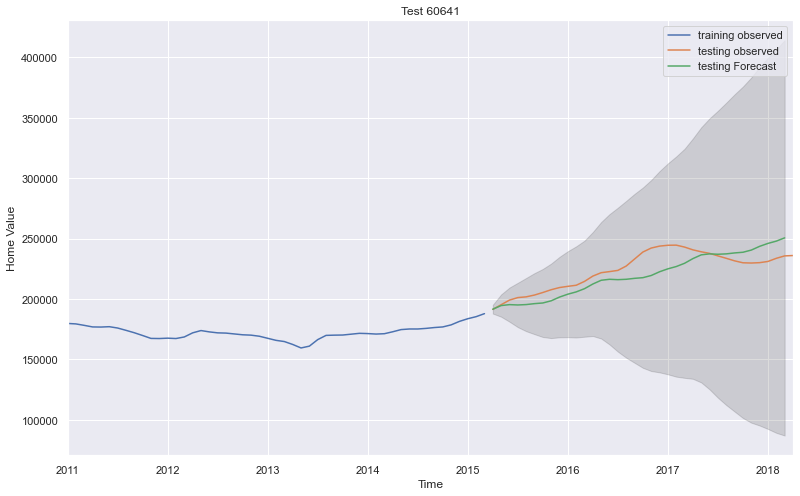

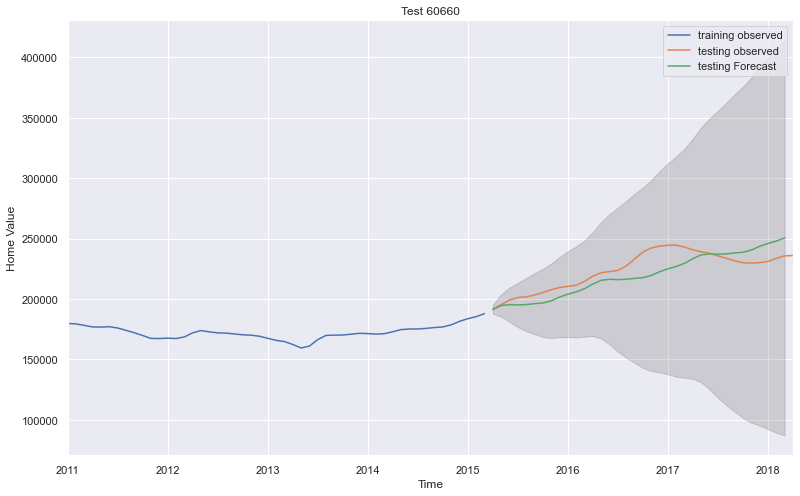

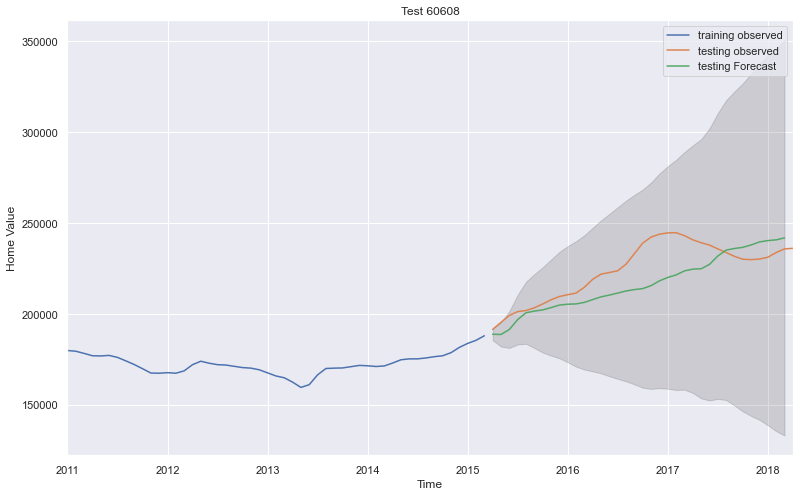

In [165]:
# Predictions and comparisons
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
RMSE_Value = []
models = {}
for name in zip_list:
    test_zip = orders[name]
    best_para = test_zip.loc[test_zip['AIC'].idxmin()]
#     df = zip_dict[name]

    ARIMA_MODEL = sm.tsa.SARIMAX(train,
                                 order = best_para['pdq'],
                                 seasonal_order = best_para['pdqs'],
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
                                
    
    output = ARIMA_MODEL.fit()
    models[name] = output
    output = models[name]
    
    # 2015-04-01 - 3 years so we can forecast 3 years out
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = test['2015-04-01':]
    
    rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    mse = ((zip_forecasted - zip_truth)**2).mean()
    
    Zipcode.append(name)
    RMSE_Value.append(rmse)
    MSE_Value.append(mse)
    

    ax = train.plot(label='training observed', figsize=(13, 8))
    ax2 = test.plot(label='testing observed', figsize=(13, 8))
#     output = models[name]
    prediction = models[name].get_forecast(steps=36)
    pred_conf = prediction.conf_int()

    prediction.predicted_mean.plot(ax=ax2, label='testing Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.15)

    
#     ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-01-01'), pred.predicted_mean.index[-1], alpha=.1, zorder=-1)

    ax.set_ylabel('Home Value')
    ax.set_title("Train " + str(name))
    ax2.set_title("Test " + str(name))
    plt.legend()
    plt.show()
    
summary_table['Zipcode'] = Zipcode
summary_table['MSE'] = MSE_Value
summary_table['RMSE'] = RMSE_Value



In [75]:
# # Predictions and comparisons
# summary_table = pd.DataFrame()
# Zipcode = []
# MSE_Value = []
# RMSE_Value = []
# models = []
# for name, pdq, pdqs, df in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], zip_dfs):
#     ARIMA_MODEL = sm.tsa.SARIMAX(df,
#                                  order = pdq,
#                                  seasonal_order = pdqs,
#                                  enforce_stationarity = False,
#                                  enforce_invertibility = False,
#                                  )
                                
    
#     output = ARIMA_MODEL.fit()
#     models.append(output)
    
    
    
#     # 2015-04-01 - 3 years so we can forecast 3 years out
#     pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic = True, full_results = True)
#     pred_dynamic_conf = pred_dynamic.conf_int()
#     zip_forecasted = pred_dynamic.predicted_mean
#     zip_truth = df['2015-04-01':]['Value']
    
#     rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
#     mse = ((zip_forecasted - zip_truth)**2).mean()
    
#     Zipcode.append(name)
#     RMSE_Value.append(rmse)
#     MSE_Value.append(mse)
    
# summary_table['Zipcode'] = Zipcode
# summary_table['MSE'] = MSE_Value
# summary_table['RMSE'] = RMSE_Value

In [134]:
summary_table
models[60647].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              60608   No. Observations:                   51
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -457.938
Date:                            Thu, 12 Nov 2020   AIC                            925.875
Time:                                    20:20:06   BIC                            931.765
Sample:                                01-01-2011   HQIC                           927.438
                                     - 03-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1637   1.09e-24   1.51e+23      0.000       0.164       0.164
ma.L1          1.0373   6.65e-23   1.56e+22      0.000       1.037       1.037
ar.S.L12       1.6923   3.32e-24    5.1e+23      0.000       1.692       1.692
ma.S.L12    1.912e+13    3.9e-32   4.91e+44      0.000    1.91e+13    1.91e+13
sigma2       1.63e-11    3.9e-10      0.042      0.967   -7.48e-10    7.81e-10
===================================================================================
Ljung-Box (Q):                      264.15   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               3.14   Skew:                             0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         1.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.97e+61. Standard errors may be unstable.
"""

In [106]:
# summary_table

                                     SARIMAX Results                                      
Dep. Variable:                              60608   No. Observations:                   51
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -221.080
Date:                            Thu, 12 Nov 2020   AIC                            448.159
Time:                                    20:20:12   BIC                            451.816
Sample:                                01-01-2011   HQIC                           449.173
                                     - 03-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7605      0.194      3.916      0.000       0.380       1.141
ar.S.L12      -0.8080      0.228   

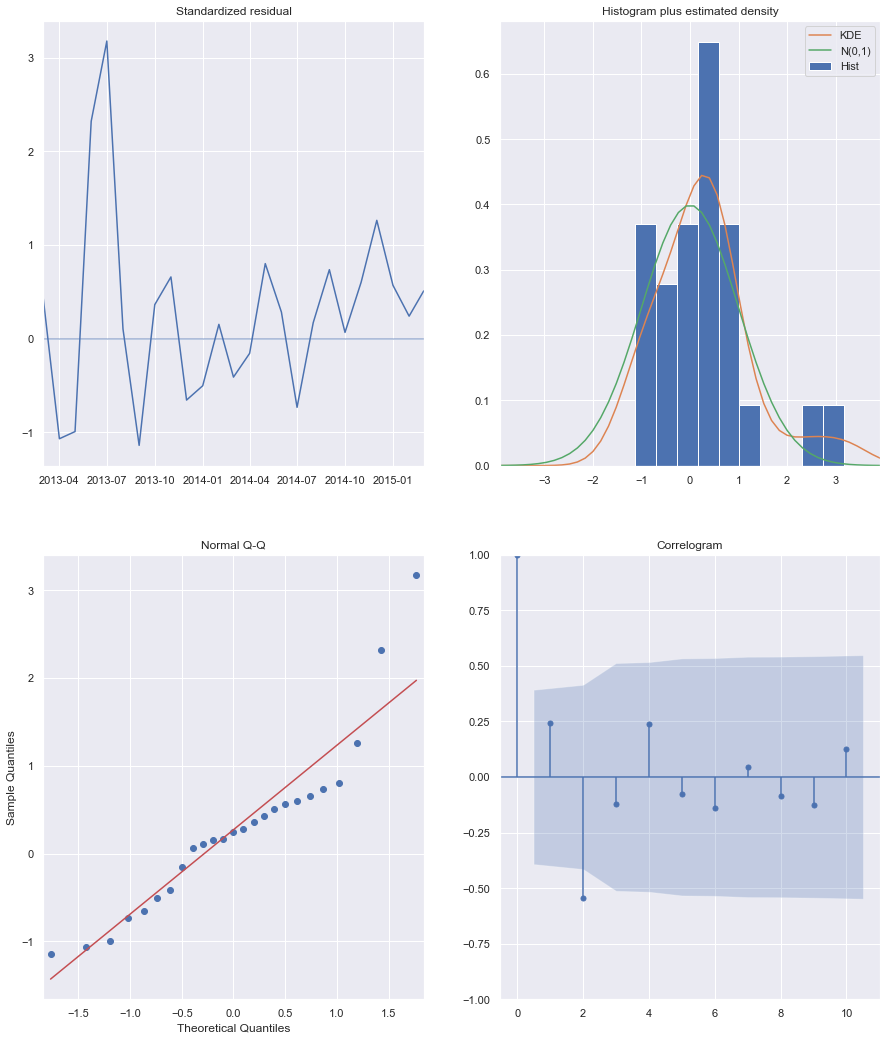

In [135]:
print(output.summary())
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [155]:
pred = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=False)
pred_conf = pred.conf_int()

In [156]:
# df.zipcode['2011':]

In [157]:
# zip_dfs

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

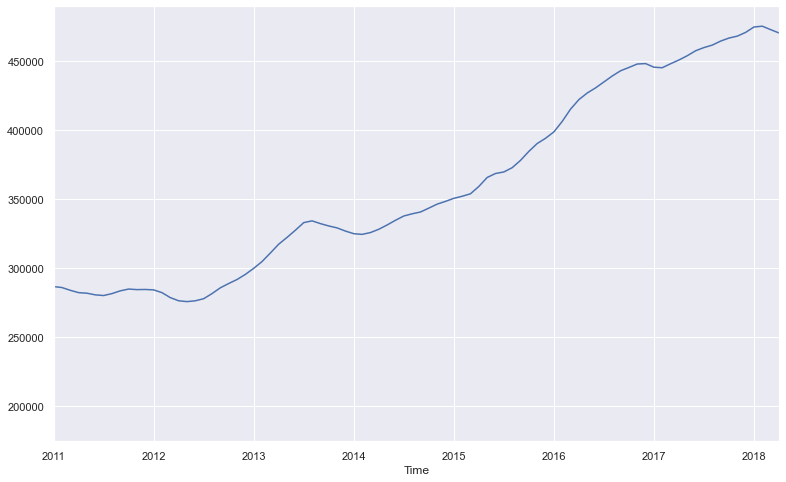

In [158]:
ax = zip_dict[60647].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9, figsize=(13, 8))

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')
ax.set_title('Forecasted' + zip_dict[name])
plt.legend()

plt.show()

In [139]:
zip_truth = zip_dict[name]['2015-04':]
zip_forecasted = pred.predicted_mean



rmse = np.sqrt(mean_squared_error(zip_truth, zip_forecasted))
mse = mean_squared_error(zip_truth, zip_forecasted)
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 3)}')
print(f'The Mean Squared Error of our forecasts is {round(mse, 3)}')

The Root Mean Squared Error of our forecasts is 1609.775
The Mean Squared Error of our forecasts is 2591375.273


In [140]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [152]:
zip_dict[name]['2011':]

Time
2011-01-01    179800.0
2011-02-01    179400.0
2011-03-01    178200.0
2011-04-01    176900.0
2011-05-01    176800.0
                ...   
2017-12-01    230100.0
2018-01-01    231100.0
2018-02-01    233700.0
2018-03-01    235700.0
2018-04-01    236000.0
Name: 60608, Length: 88, dtype: float64

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

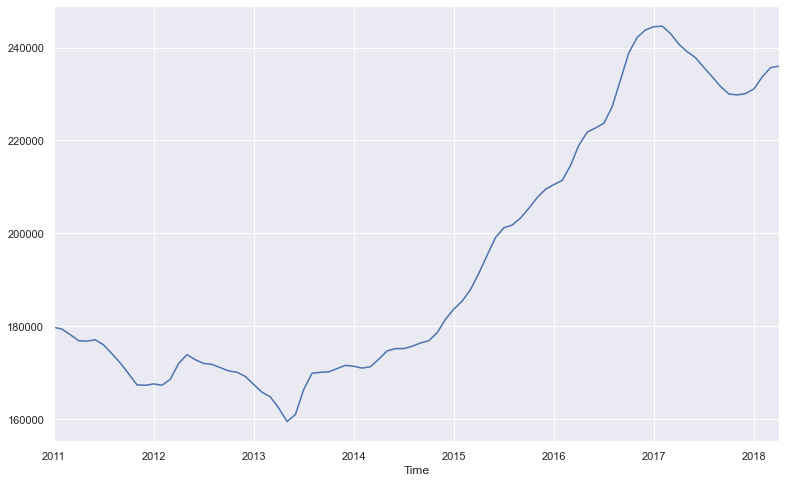

In [153]:
ax = zip_dict[name].plot(label='observed', figsize=(13, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-01-01'), pred.predicted_mean.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [142]:
Yr3_forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []
for name in zip_list:
    output = models[name]
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    current.append(zip_dict[name]['2018-04'][0])
    forecast_3Yr.append(forecast_3)
    
    
    


    
Yr3_forecast_table['Zipcode'] = Zipcode
Yr3_forecast_table['Current Value'] = current
Yr3_forecast_table['3 Years Value'] = forecast_3Yr
Yr3_forecast_table['3Yr-ROI']=((Yr3_forecast_table['3 Years Value'] - Yr3_forecast_table['Current Value'])
                           /Yr3_forecast_table['Current Value'])*100

In [143]:
Yr3_forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Zipcode,Current Value,3 Years Value,3Yr-ROI
8,60619,129600.0,3.413473e+06,2533.852762
10,60620,130300.0,3.413473e+06,2519.703131
13,60649,136800.0,3.413473e+06,2395.228932
14,60616,355500.0,3.413473e+06,860.189361
16,60615,456200.0,3.413473e+06,648.240504


In [144]:
# forecast 36 steps (3 years)


# lower_series = pred_conf[:, 0]
# upper_series = pred_conf[:, 1]
forecast_list = ['60620', '60634', '60619', '60629', '60613']

In [147]:
for name in zip_list:
#     print(name)
    output = models[name]
    print(output)

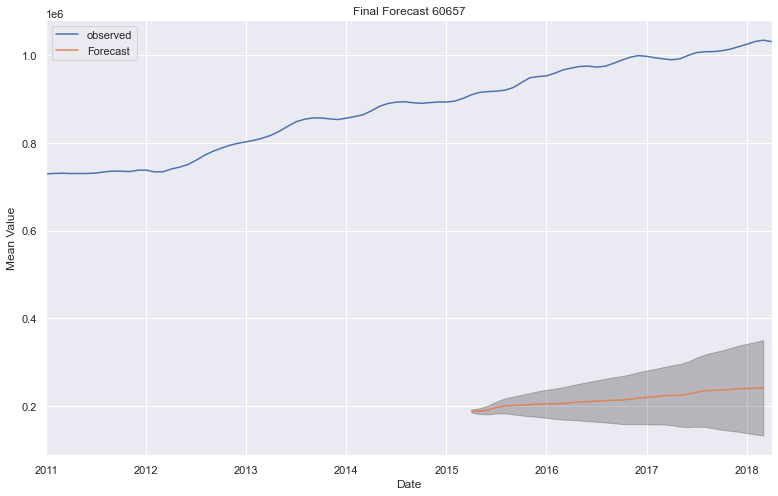

60657


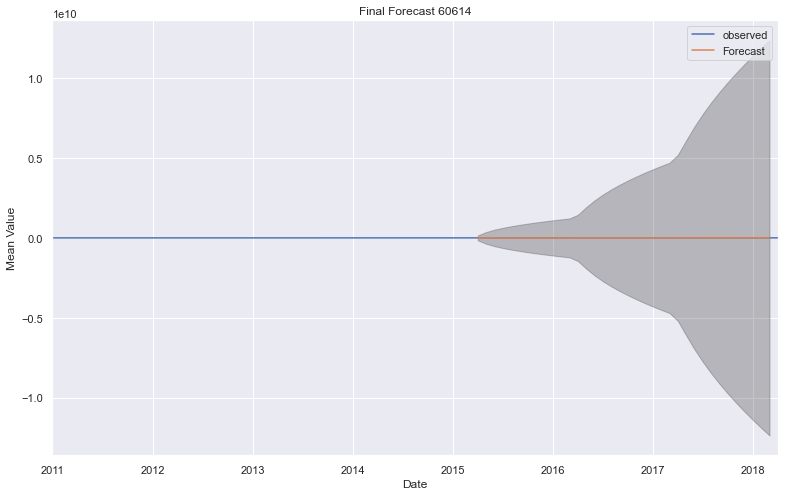

60614


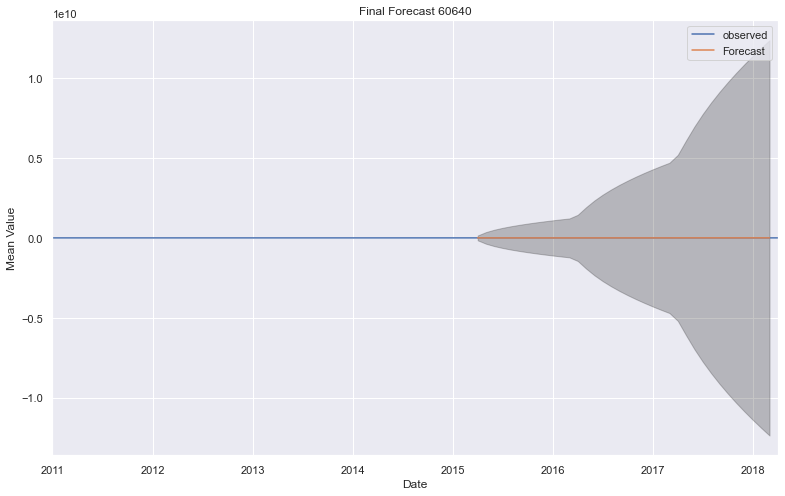

60640


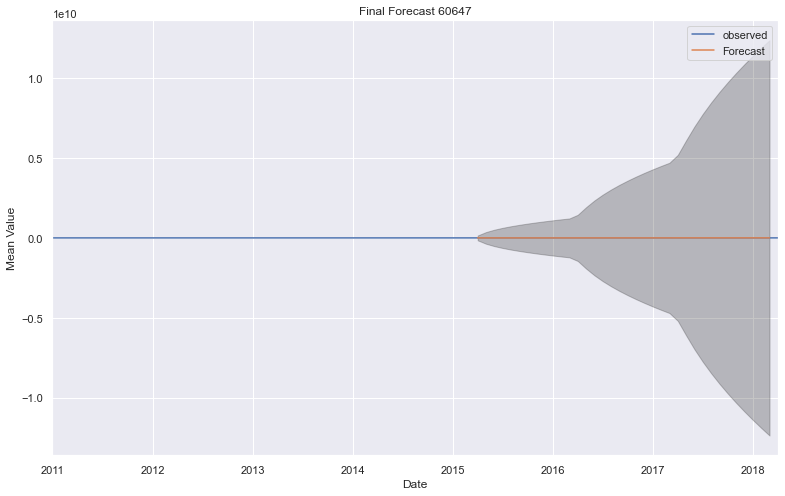

60647


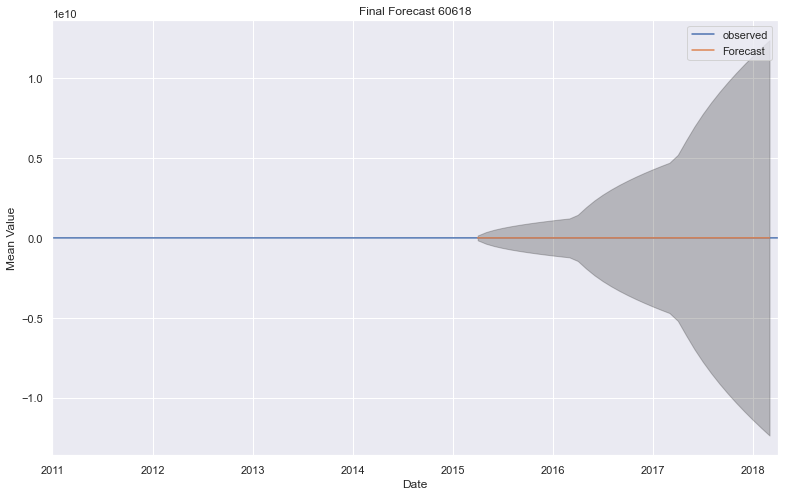

60618


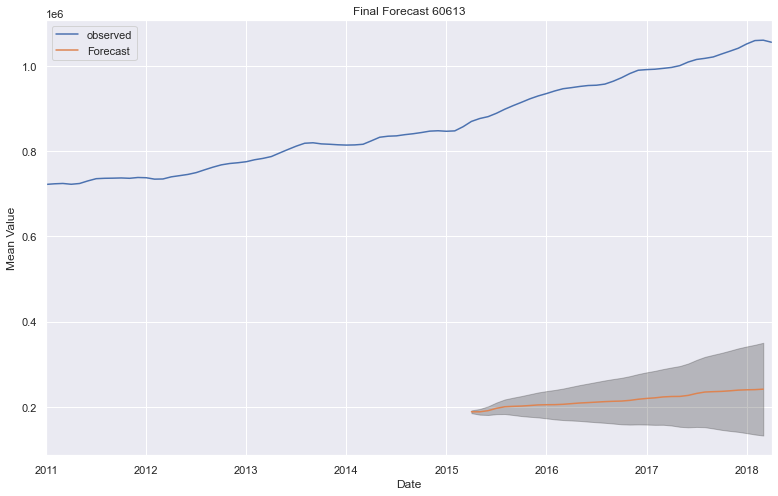

60613


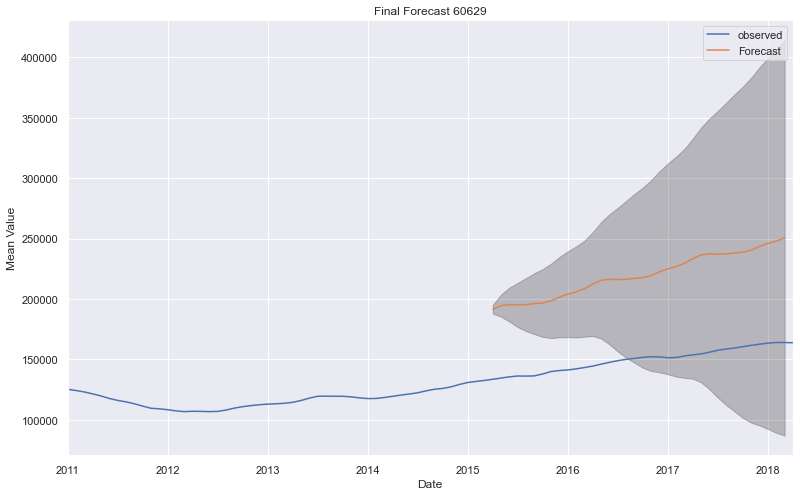

60629


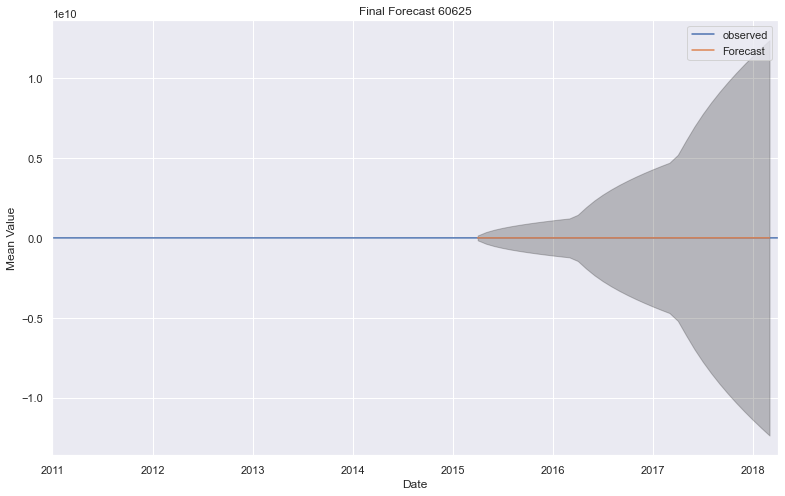

60625


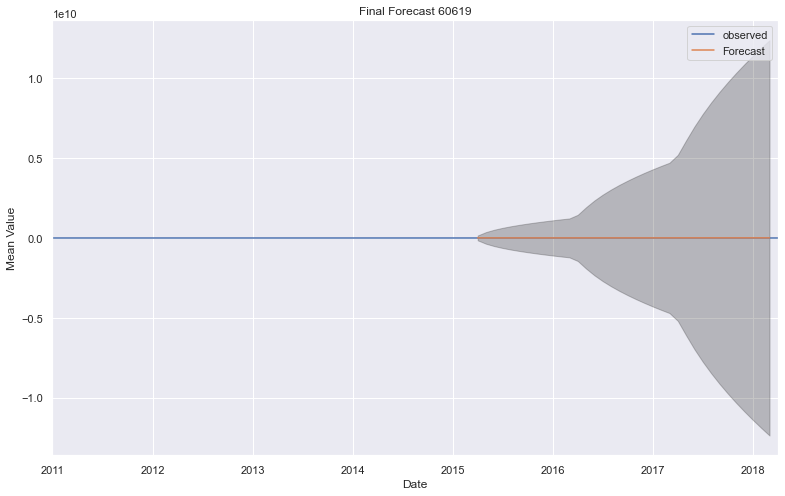

60619


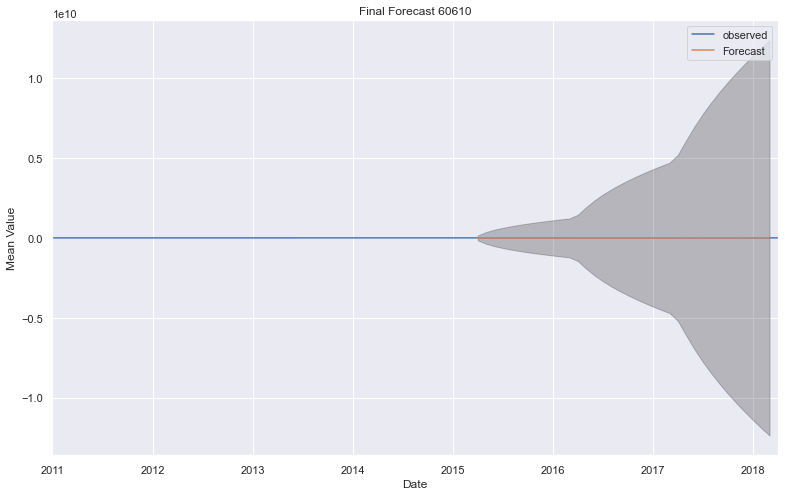

60610


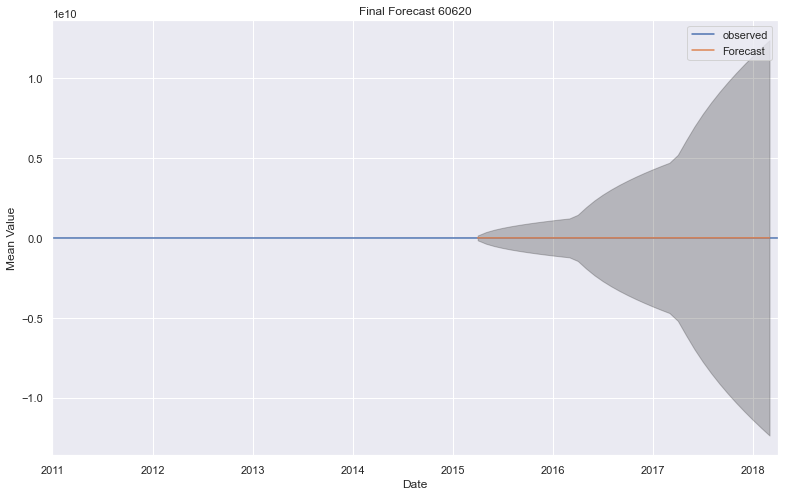

60620


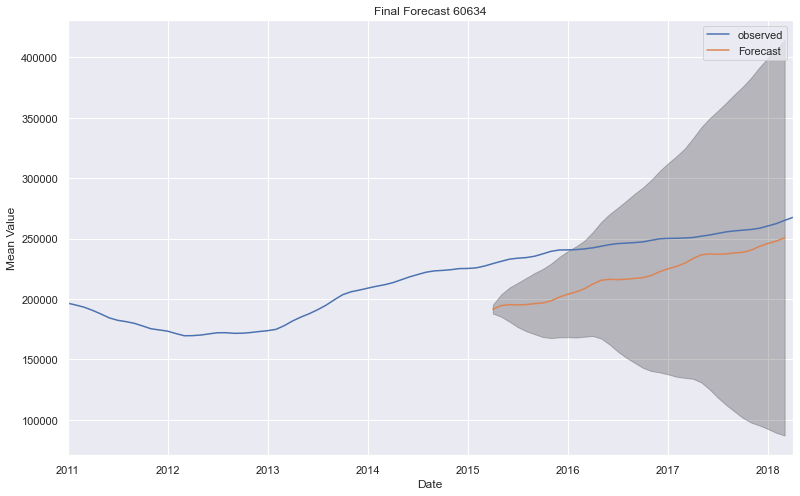

60634


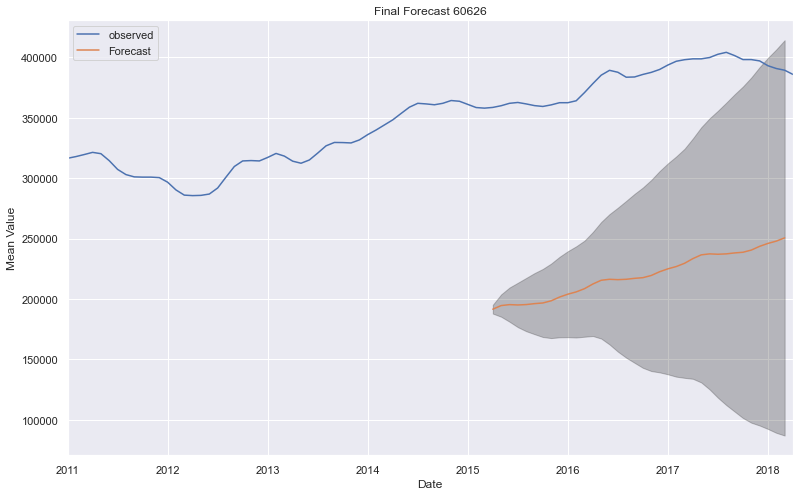

60626


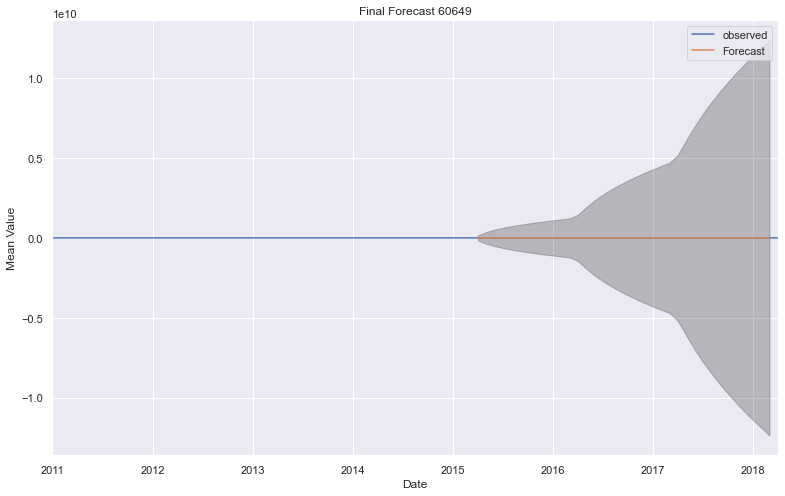

60649


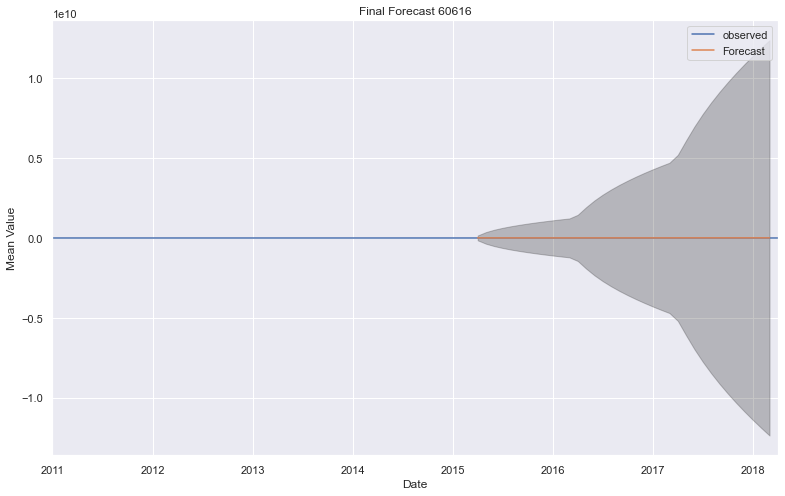

60616


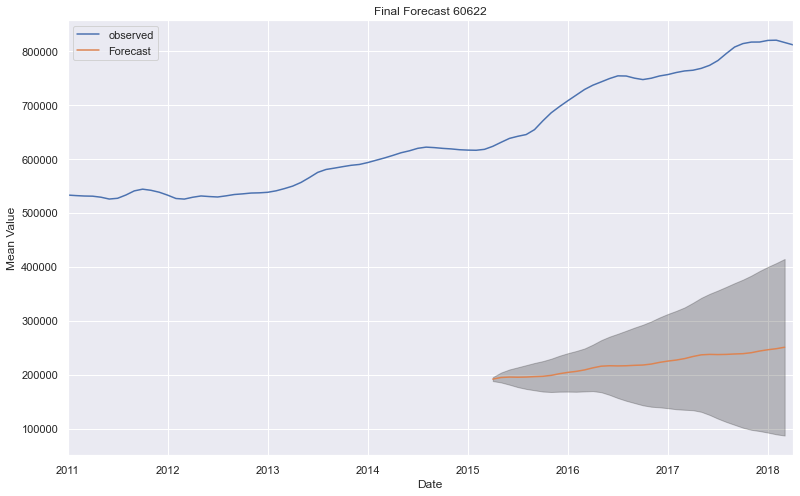

60622


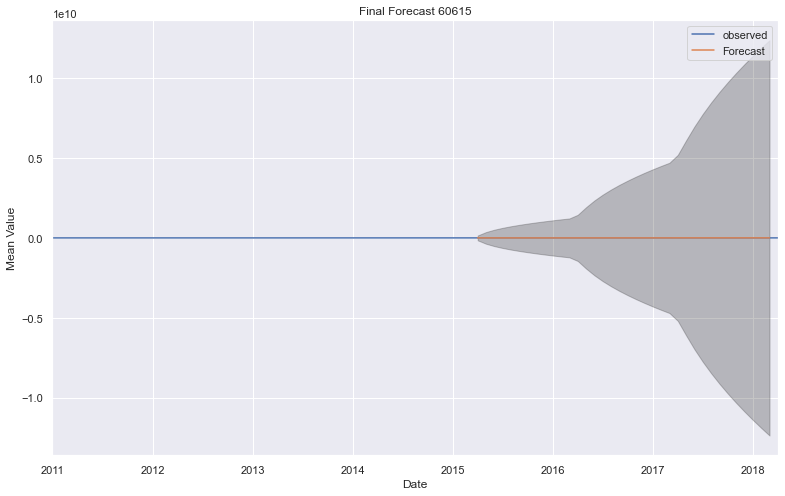

60615


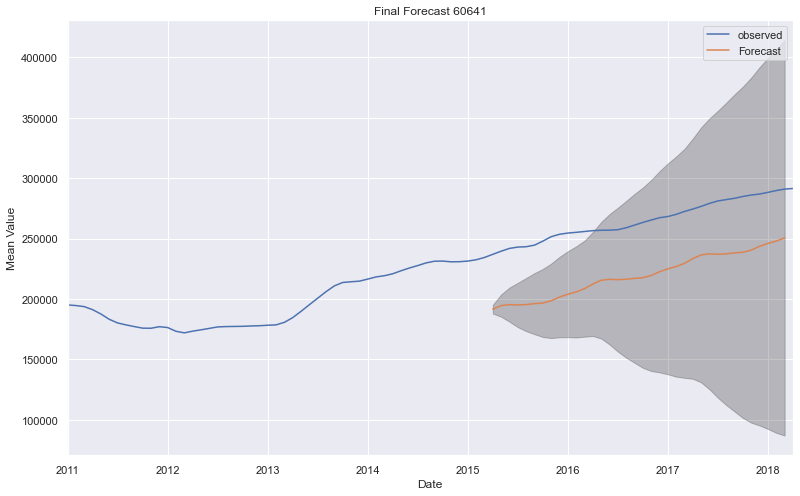

60641


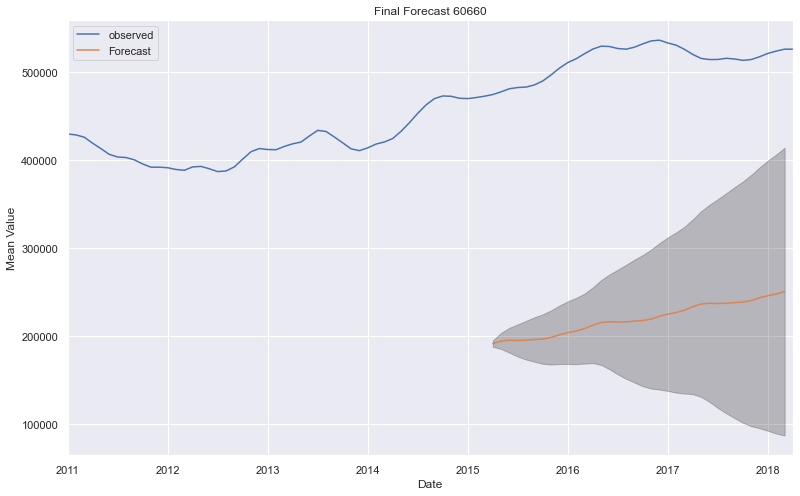

60660


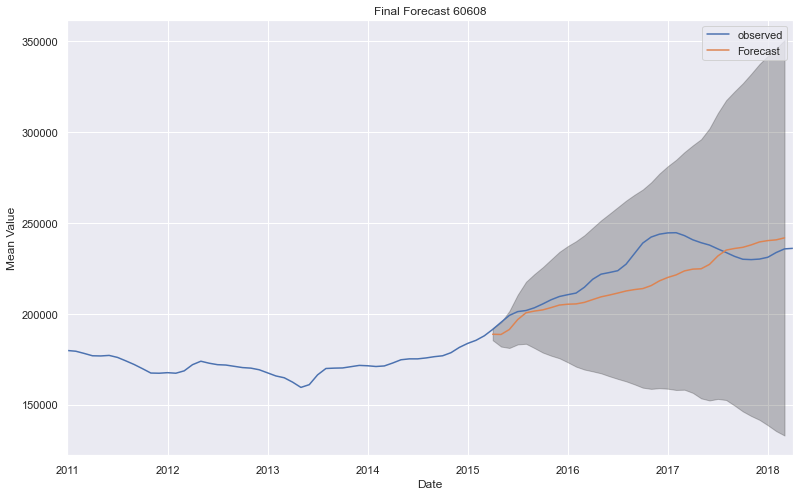

60608


In [151]:
# 3-year predictions
for name in zip_list:

#     df = zip_dict[name]
    ax = zip_dict[name].plot(label='observed', figsize=(13, 8))
    output = models[name]
    prediction = output.get_forecast(steps=36)
    pred_conf = prediction.conf_int()
    prediction.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='k', alpha=0.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Value')
    plt.title("Final Forecast " + str(name))
    plt.legend()
    plt.show()
    print(name)

#     print(lower)
#     print(upper)
#     print()

In [41]:
Yr5_forecast_table = pd.DataFrame()
current = []
forecast_5Yr = []


for zipcode, output, Yr3_forecast_table in zip(Zipcode, models, zip_dfs):
    pred_5 = output.get_forecast(steps = 36)
    pred_conf_5 = pred_5.conf_int()
    forecast_5 = pred_5.predicted_mean.to_numpy()[-1]
    current.append(df['2018-04']['Value'][0])
    forecast_5Yr.append(forecast_5)
    
# Yr5_forecast_table['Zipcode'] = Zipcode
# Yr5_forecast_table['Current Value'] = current
# Yr5_forecast_table['5 Years Value'] = forecast_5Yr
# Yr5_forecast_table['5Yr-ROI']=((Yr5_forecast_table['5 Years Value'] - Yr5_forecast_table['Current Value'])
#                            /Yr5_forecast_table['Current Value'])*100

In [42]:
Yr5_forecast_table.sort_values('5Yr-ROI', ascending=False).head()

KeyError: '5Yr-ROI'

In [ ]:
# from pmdarima.arima import auto_arima
# stepwise_model = auto_arima(df, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())